In [1]:
import numpy as np
import pandas as pd
from matplotlib import style
from sklearn.svm import SVC
from sklearn.datasets import make_gaussian_quantiles
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
style.use('ggplot')

In [2]:
X, y = make_gaussian_quantiles(n_samples=200, n_features=2, n_classes=2, cov=3)

In [3]:
X.shape

(200, 2)

In [4]:
y.shape

(200,)

In [5]:
y

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0])

In [6]:
# radial basis function kernel, or RBF kernel
# Auto gamma equals 1/n_features
def draw_svm(X, y, C=1.0, gamma='auto'):
    plt.scatter(X[:,0], X[:,1], c=y)
    clf = SVC(kernel='rbf', C=C, gamma=gamma)
    clf_fit = clf.fit(X, y)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 200)
    yy = np.linspace(ylim[0], ylim[1], 200)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none')
    plt.show()
    return clf_fit

In [7]:
clf_arr = []

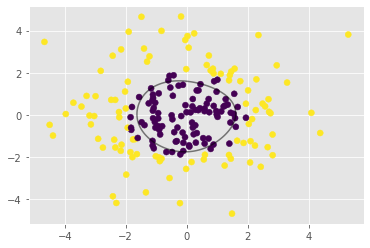

In [8]:
clf_arr.append(draw_svm(X, y, 0.01))

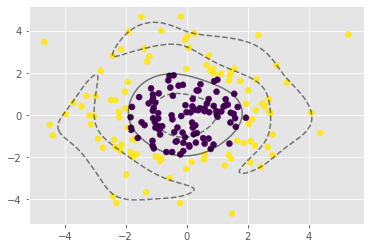

In [9]:
clf_arr.append(draw_svm(X, y, 0.1))

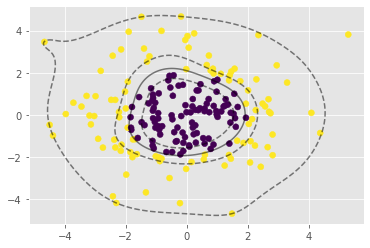

In [10]:
clf_arr.append(draw_svm(X, y, 1))

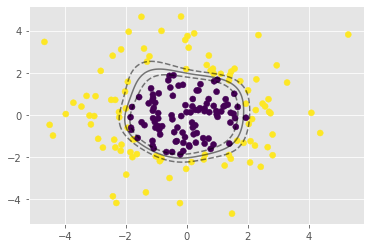

In [11]:
clf_arr.append(draw_svm(X, y, 10))

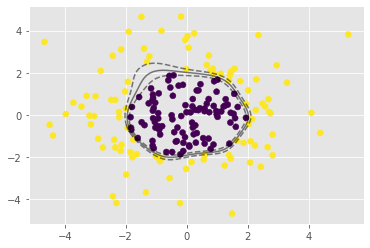

In [12]:
clf_arr.append(draw_svm(X, y, 100))

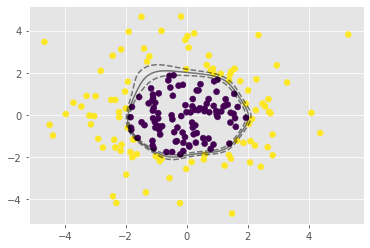

In [13]:
clf_arr.append(draw_svm(X, y, 1000))

In [14]:
for i, clf in enumerate(clf_arr):
    print(clf.score(X, y))

0.88
0.955
0.975
0.98
1.0
1.0


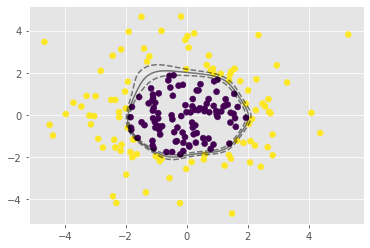

In [15]:
clf_arr.append(draw_svm(X, y, 10000))

In [16]:
for i, clf in enumerate(clf_arr):
    print(clf.score(X, y))

0.88
0.955
0.975
0.98
1.0
1.0
1.0
